In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import ipywidgets as w
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from torch.utils.data import DataLoader, random_split
from iwc2tb.GMI.gmiData import gmiData
import os

from typhon.retrieval.qrnn import set_backend, QRNN
set_backend("pytorch")

Using TensorFlow backend.


In [37]:
batchSize          = 256
inChannels         = np.array(['166.5V', '166.5H', '183+-3', '183+-7'], dtype=object)
validation_data    = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_test_satdata.nc"), inChannels, batch_size = batchSize) 
#validation_data    = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_test.nc"), inChannels, batch_size = batchSize) 

In [10]:
qrnn =  QRNN.load('try/qrnn_gmi_iwp.nc')


2558


Text(0.5, 0, 'IWP[kg/m2]')

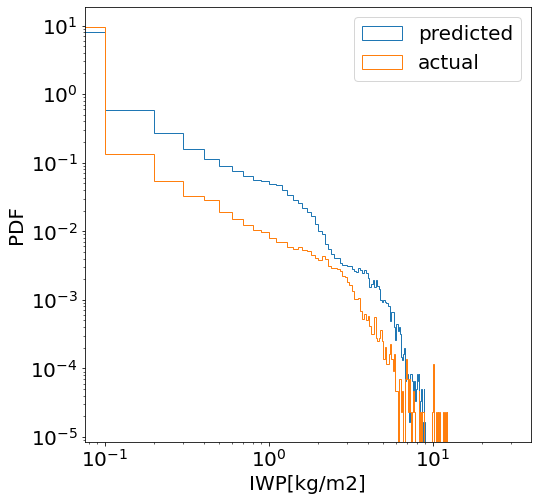

In [38]:

y_pre = []
y = []
y_prior = []
y_pos_mean = []
x_in = []

nbatch = validation_data.__len__()
print (nbatch)
for i in range(nbatch):
    
    xx, yy = validation_data.__getitem__(i)
    
    x = xx.detach().numpy() 

    y_pre.append(qrnn.predict(x)) 
    y_pos_mean.append((qrnn.posterior_mean(x)))
       
    y.append(yy.detach().numpy())
    x_in.append(x)

x_in = np.concatenate(x_in, axis = 0)
y_pre = np.concatenate(y_pre, axis = 0)
y = np.concatenate(y, axis= 0)
y_pos_mean = np.concatenate(y_pos_mean, axis = 0)

plt.rcParams.update({'font.size': 20})
bins1 = np.arange(0, 30, 0.1)
fig, ax = plt.subplots(1, 1, figsize = [8, 8])
ax.hist(y_pos_mean, bins1, density = True , histtype = "step", label = "predicted")


ax.hist(y, bins1, density = True, histtype = "step", label = "actual")
ax.set_yscale('log')
ax.set_xscale('log')

ax.legend()
ax.set_ylabel("PDF")
ax.set_xlabel("IWP[kg/m2]")

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  


Text(0.5, 0, 'IWP Observed [kg/m2]')

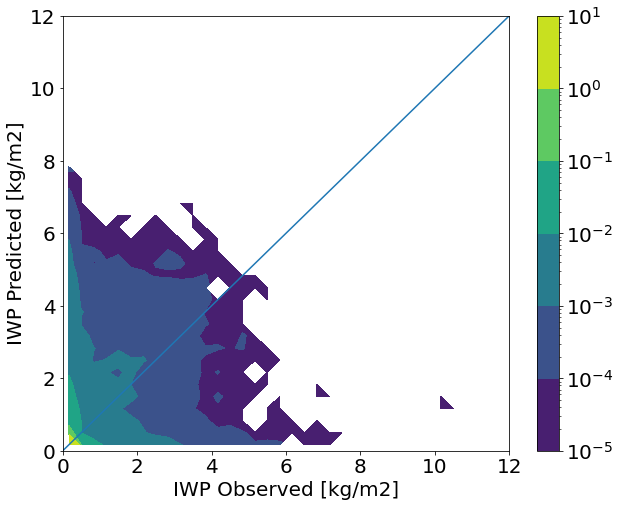

In [41]:
import scipy
from matplotlib import ticker, cm
xyrange = [[0, 15], [0, 15]] # data range

bins = [45, 45] # number of bins
hh, locx, locy = np.histogram2d(y, y_pos_mean, 
                                range=xyrange, bins=bins, density = True)
posx = np.digitize(y, locx)
posy = np.digitize(y_pos_mean, locy)

fig, ax = plt.subplots(1, 1, figsize = [10, 8])
cs = ax.contourf(np.flipud(hh.T),
                extent=np.array(xyrange).flatten(), 
            locator= ticker.LogLocator(), origin='upper')
cbar = fig.colorbar(cs)
ax.set_ylim([0, 12])
ax.set_xlim([0, 12])
xy = np.arange(0, 13, 1)
yy = xy
ax.plot(xy, yy)
ax.set_ylabel("IWP Predicted [kg/m2]")
ax.set_xlabel("IWP Observed [kg/m2]")
#ax.set_yscale('log')
#ax.set_xscale('log')

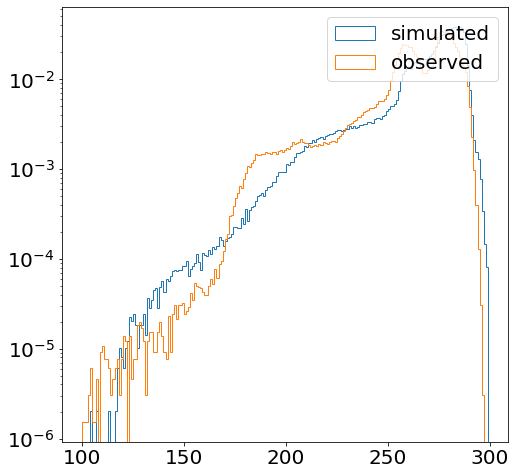

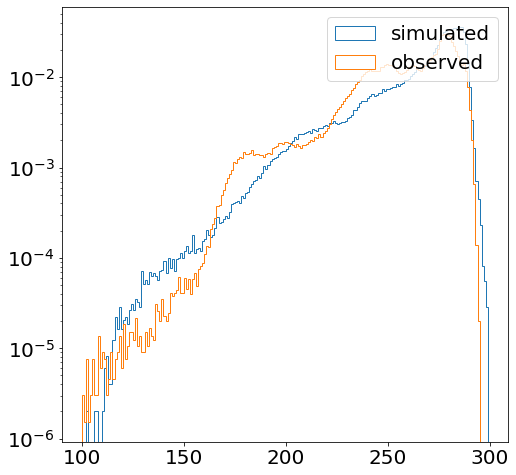

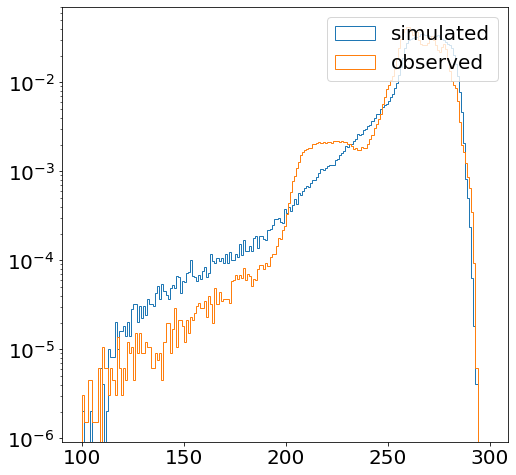

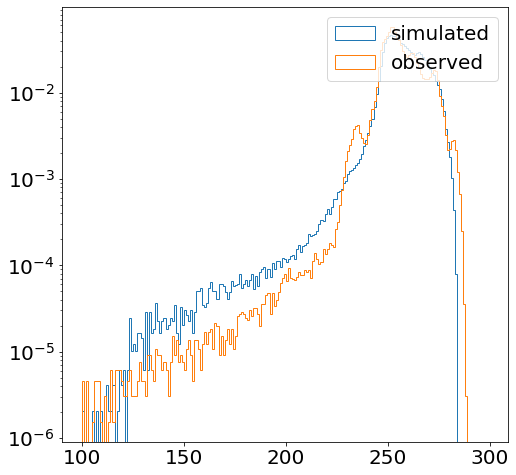

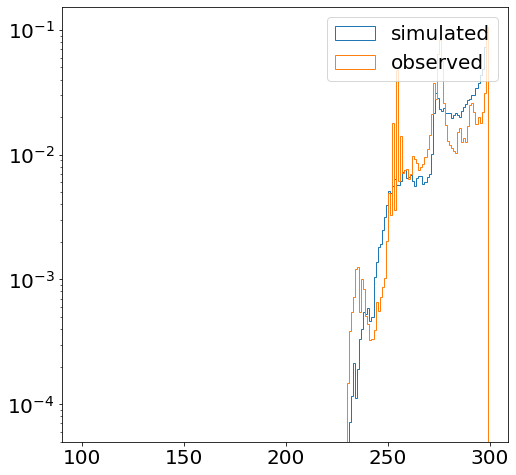

In [36]:
bins = np.arange(100, 300, 1)
for i in range(0, 5):
    fig, ax = plt.subplots(1, 1 , figsize = [8, 8])
    ax.hist(validation_data.x[:, i], bins, density = True, histtype = "step", label = "simulated")
    ax.hist(validation_data1.x[:, i], bins,  density = True, histtype = "step", label = "observed")
    ax.set_yscale('log')
    ax.legend()

In [42]:
validation_data1.x.shape

(654823, 8)